In [1]:
import gc

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from matplotlib.ticker import FormatStrFormatter
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


In [2]:
df = pd.read_csv('data/first_all.csv')
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,device_screen_resolution,device_browser,geo_country,geo_city,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Zlatoust,2021-11-24,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing
1,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Zlatoust,2021-11-24,4,event,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click
2,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,...,385x854,Samsung Internet,Russia,Moscow,2021-11-14,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing
3,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Krasnoyarsk,2021-12-28,10,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region
4,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Krasnoyarsk,2021-12-28,13,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region


# Data preparation

## Data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15685219 entries, 0 to 15685218
Data columns (total 21 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   client_id                 float64
 2   visit_date                object 
 3   visit_time                object 
 4   visit_number              int64  
 5   utm_source                object 
 6   utm_medium                object 
 7   utm_campaign              object 
 8   utm_adcontent             object 
 9   device_category           object 
 10  device_brand              object 
 11  device_screen_resolution  object 
 12  device_browser            object 
 13  geo_country               object 
 14  geo_city                  object 
 15  hit_date                  object 
 16  hit_number                int64  
 17  hit_type                  object 
 18  hit_page_path             object 
 19  event_category            object 
 20  event_action          

In [4]:
def print_useful_rows_info(data):
    print(f'Количество полностью заполненных объектов из всей выборки: {len(data.dropna())}')
    print(f'Процент полностью заполенных объектов из всей выборки: {round((len(data.dropna()) / len(data)) * 100, 2)}%')
def print_missing_values(data):
    missing_values = ((data.isna().sum() / len(data)) * 100).sort_values()
    print(f'Процент пропущенных значений в колонках:')
    print(missing_values)

In [5]:
print_useful_rows_info(df)

Количество полностью заполненных объектов из всей выборки: 9765584
Процент полностью заполенных объектов из всей выборки: 62.26%


<Axes: >

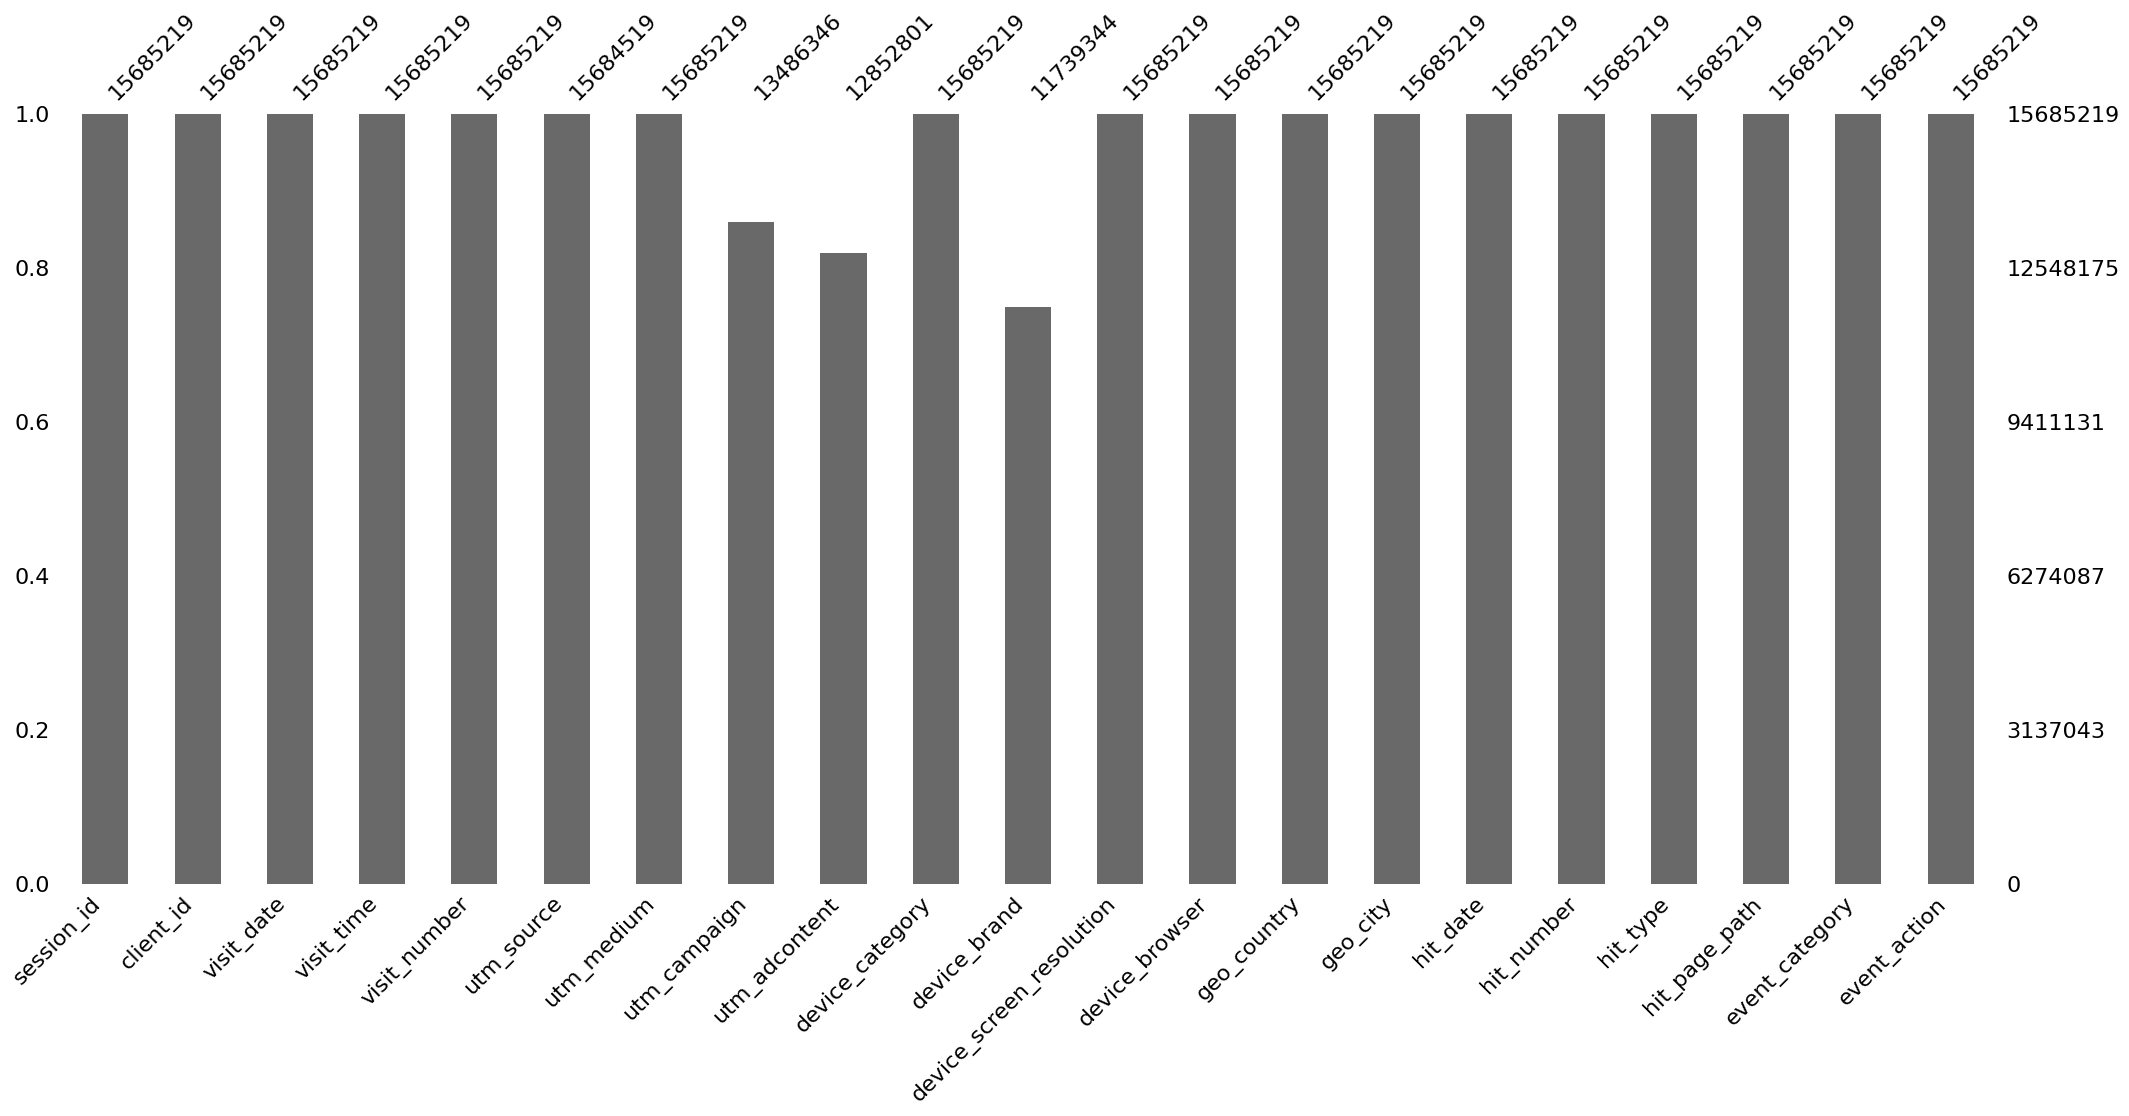

In [6]:
msno.bar(df)

In [7]:
print_missing_values(df)

Процент пропущенных значений в колонках:
session_id                   0.000000
hit_page_path                0.000000
hit_type                     0.000000
hit_number                   0.000000
hit_date                     0.000000
geo_city                     0.000000
geo_country                  0.000000
device_browser               0.000000
device_screen_resolution     0.000000
event_category               0.000000
event_action                 0.000000
utm_medium                   0.000000
visit_number                 0.000000
visit_time                   0.000000
visit_date                   0.000000
client_id                    0.000000
device_category              0.000000
utm_source                   0.004463
utm_campaign                14.018759
utm_adcontent               18.057880
device_brand                25.156646
dtype: float64


In [8]:
df.device_brand.fillna('other', inplace=True)
df.device_brand.isna().sum()

0

In [9]:
df.utm_adcontent.value_counts(dropna=False)

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    9647665
NaN                     2832418
vCIpmpaGBnIQhyYNkXqp    1806637
xhoenQgDQsgfEPYNPwKO     345071
PkybGvWbaqORmxjNunqZ     199457
                         ...   
EFePHapVShTKxBNclrhX          1
WbXQsVOKLOcJrHikuQTZ          1
gQEnaeQmOHisHSTEyzhp          1
vXARZToVDdvNhALiQtvl          1
fBRoTJlPSQvdkRoAJkVN          1
Name: count, Length: 281, dtype: int64

In [10]:
df.utm_adcontent.fillna(df.utm_adcontent.mode()[0], inplace=True)
df.utm_adcontent.isna().sum()

0

In [11]:
df.utm_campaign.fillna(df.utm_campaign.mode()[0], inplace=True)
df.utm_campaign.isna().sum()

0

In [12]:
df.utm_source.fillna(df.utm_source.mode()[0], inplace=True)
df.utm_source.isna().sum()

0

In [13]:
print_missing_values(df)

Процент пропущенных значений в колонках:
session_id                  0.0
hit_page_path               0.0
hit_type                    0.0
hit_number                  0.0
hit_date                    0.0
geo_city                    0.0
geo_country                 0.0
device_browser              0.0
device_screen_resolution    0.0
event_category              0.0
device_brand                0.0
utm_adcontent               0.0
utm_campaign                0.0
utm_medium                  0.0
utm_source                  0.0
visit_number                0.0
visit_time                  0.0
visit_date                  0.0
client_id                   0.0
device_category             0.0
event_action                0.0
dtype: float64


In [14]:
print_useful_rows_info(df)

Количество полностью заполненных объектов из всей выборки: 15685219
Процент полностью заполенных объектов из всей выборки: 100.0%


In [ ]:
df.drop_duplicates(inplace=True)

## Data Visualisation

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15685219 entries, 0 to 15685218
Data columns (total 21 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   client_id                 float64
 2   visit_date                object 
 3   visit_time                object 
 4   visit_number              int64  
 5   utm_source                object 
 6   utm_medium                object 
 7   utm_campaign              object 
 8   utm_adcontent             object 
 9   device_category           object 
 10  device_brand              object 
 11  device_screen_resolution  object 
 12  device_browser            object 
 13  geo_country               object 
 14  geo_city                  object 
 15  hit_date                  object 
 16  hit_number                int64  
 17  hit_type                  object 
 18  hit_page_path             object 
 19  event_category            object 
 20  event_action          

In [16]:
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,device_screen_resolution,device_browser,geo_country,geo_city,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Zlatoust,2021-11-24,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing
1,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Zlatoust,2021-11-24,4,event,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click
2,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,...,385x854,Samsung Internet,Russia,Moscow,2021-11-14,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing
3,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Krasnoyarsk,2021-12-28,10,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region
4,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Krasnoyarsk,2021-12-28,13,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region


In [17]:
df.visit_date = pd.to_datetime(df.visit_date)
df.visit_time = pd.to_datetime(df.visit_time)

C:\Users\almaz\AppData\Local\Temp\ipykernel_17968\2731582312.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.visit_time = pd.to_datetime(df.visit_time)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15685219 entries, 0 to 15685218
Data columns (total 21 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   session_id                object        
 1   client_id                 float64       
 2   visit_date                datetime64[ns]
 3   visit_time                datetime64[ns]
 4   visit_number              int64         
 5   utm_source                object        
 6   utm_medium                object        
 7   utm_campaign              object        
 8   utm_adcontent             object        
 9   device_category           object        
 10  device_brand              object        
 11  device_screen_resolution  object        
 12  device_browser            object        
 13  geo_country               object        
 14  geo_city                  object        
 15  hit_date                  object        
 16  hit_number                int64         
 17  hit_ty

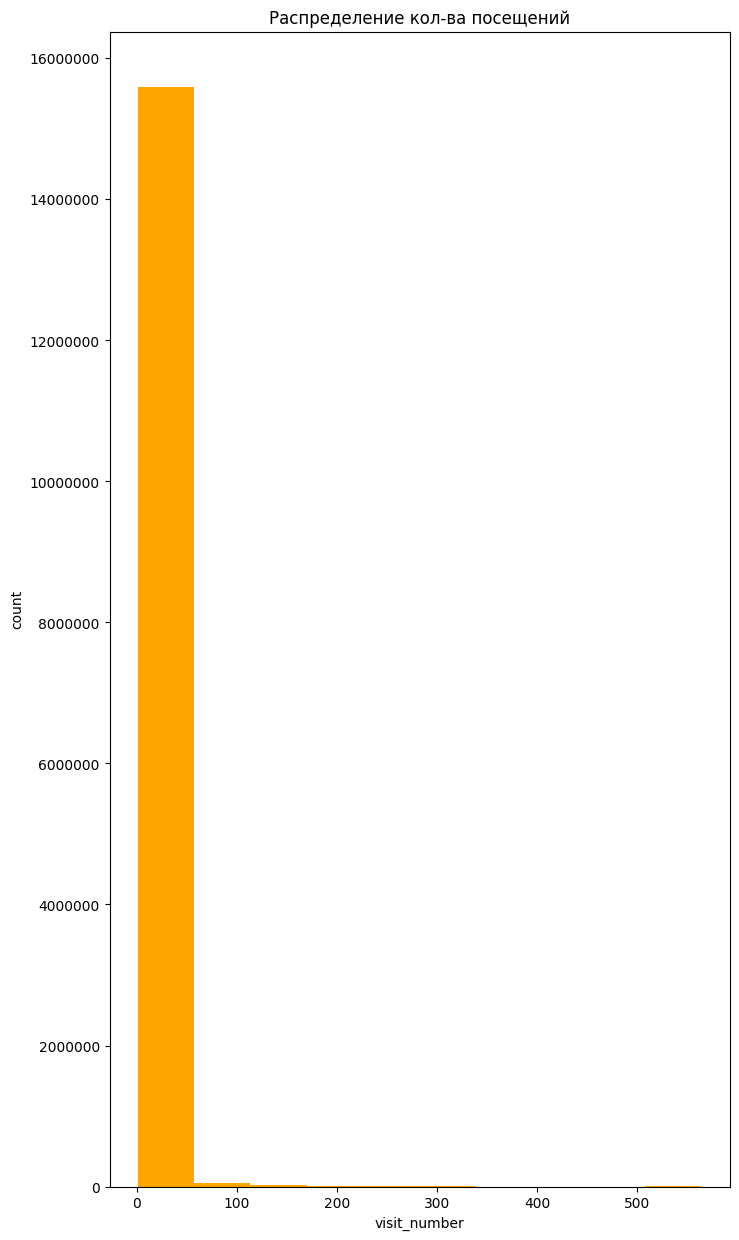

In [19]:
fig, ax = plt.subplots(figsize=(8,15))
ax.hist(df.visit_number, color = 'orange')
ax.set_xlabel('visit_number')
ax.set_ylabel('count')
ax.set_title('Распределение кол-ва посещений')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

<Axes: >

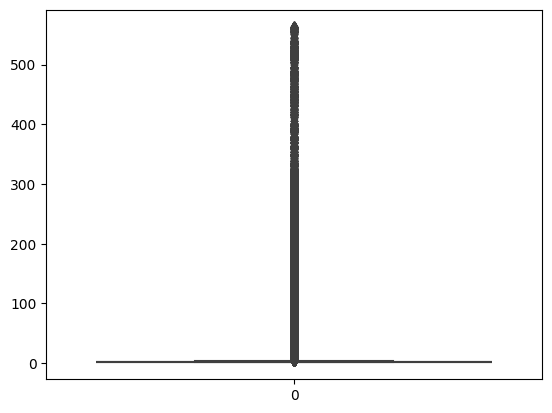

In [20]:
sns.boxplot(df.visit_number)

In [21]:
df.visit_number.describe().apply(FormatStrFormatter('%.0f'))

count    15685219
mean            3
std            13
min             1
25%             1
50%             1
75%             2
max           564
Name: visit_number, dtype: object

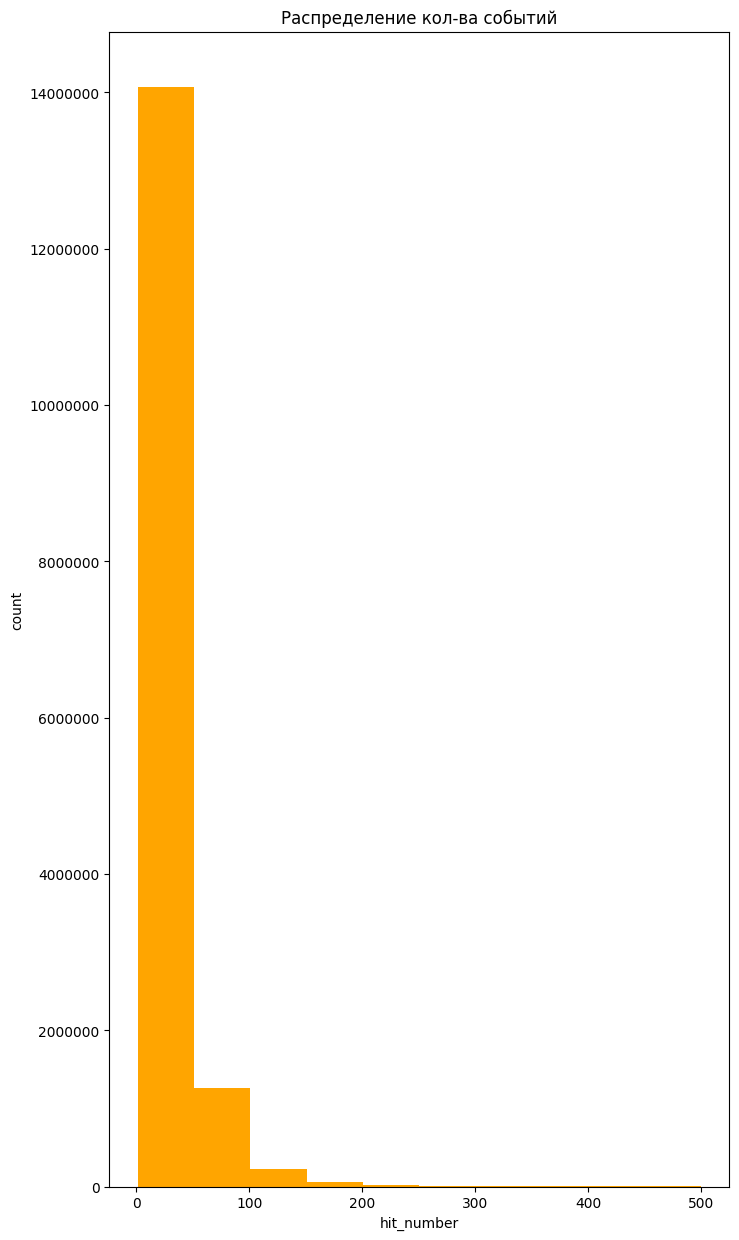

In [22]:
_, ax = plt.subplots(figsize=(8,15))
ax.hist(df.hit_number, color = 'orange')
ax.set_xlabel('hit_number')
ax.set_ylabel('count')
ax.set_title('Распределение кол-ва событий')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

<Axes: >

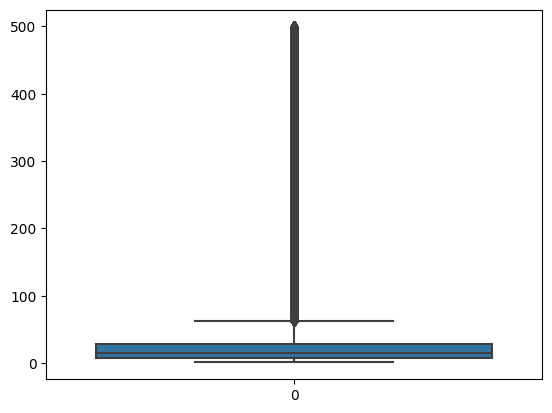

In [23]:
sns.boxplot(df.hit_number)

In [24]:
df.hit_number.describe().apply(FormatStrFormatter('%.0f'))

count    15685219
mean           23
std            29
min             1
25%             7
50%            15
75%            29
max           500
Name: hit_number, dtype: object

In [52]:
stats = df.groupby(["event_category"], as_index=False).agg({"session_id": "count"}).rename(columns={"session_id": "count"})
stats.sort_values('count', ascending=False, inplace=True)

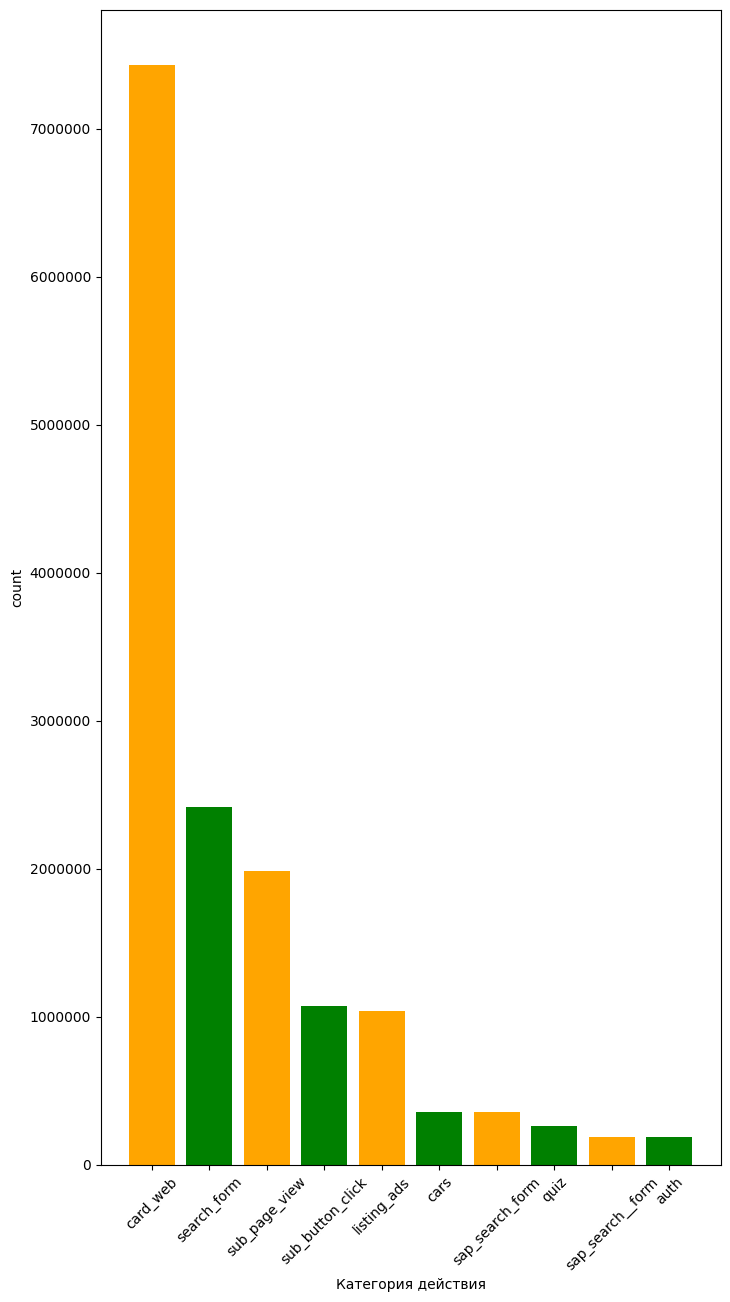

In [60]:
_, ax = plt.subplots(figsize=(8,15))
ax.bar(stats['event_category'].iloc[0:10], stats['count'].iloc[0:10], color = ['orange', 'green'])
ax.set_xlabel('Категория действия')
ax.set_ylabel('count')
plt.xticks(rotation = 45)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [61]:
stats = df.groupby(["geo_country"], as_index=False).agg({"session_id": "count"}).rename(columns={"session_id": "count"})
stats.sort_values('count', ascending=False, inplace=True)

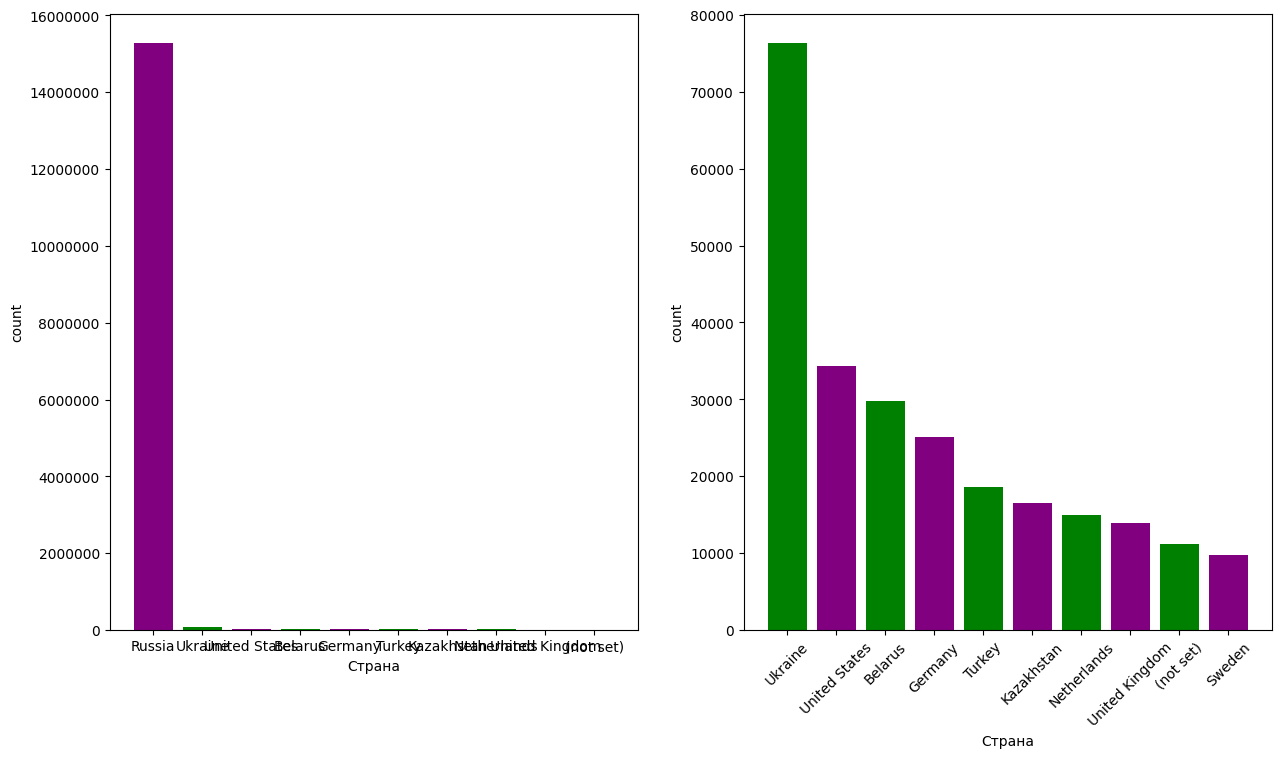

In [72]:
_, (ax1, ax2) = plt.subplots(figsize=(15,8), ncols=2)
ax1.bar(stats['geo_country'].iloc[0:10], stats['count'].iloc[0:10], color = ['purple', 'green'])
ax1.set_xlabel('Страна')
ax1.set_ylabel('count')
plt.xticks(rotation = 45)

ax2.bar(stats['geo_country'].iloc[1:11], stats['count'].iloc[1:11], color = ['green', 'purple'])
ax2.set_xlabel('Страна')
ax2.set_ylabel('count')

ax1.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [73]:
stats = df.groupby(["device_category"], as_index=False).agg({"session_id": "count"}).rename(columns={"session_id": "count"})
stats.sort_values('count', ascending=False, inplace=True)

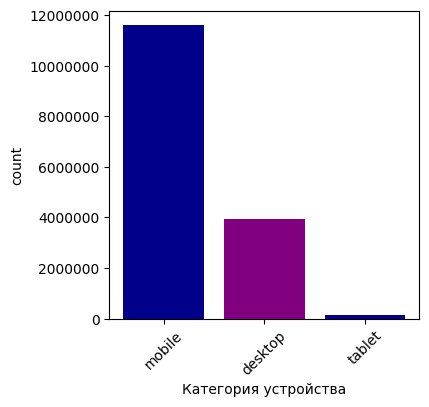

In [79]:
_, ax = plt.subplots(figsize=(4,4))
ax.bar(stats['device_category'], stats['count'], color = ['darkblue', 'purple'])
ax.set_xlabel('Категория устройства')
ax.set_ylabel('count')
plt.xticks(rotation = 45)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [80]:
stats = df.groupby(["utm_medium"], as_index=False).agg({"session_id": "count"}).rename(columns={"session_id": "count"})
stats.sort_values('count', ascending=False, inplace=True)

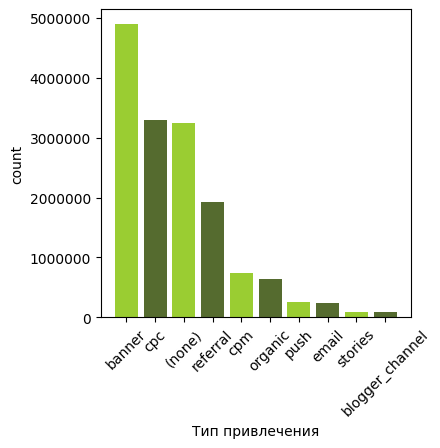

In [84]:
_, ax = plt.subplots(figsize=(4,4))
ax.bar(stats['utm_medium'].iloc[:10], stats['count'].iloc[:10], color = ['yellowgreen', 'darkolivegreen'])
ax.set_xlabel('Тип привлечения')
ax.set_ylabel('count')
plt.xticks(rotation = 45)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [88]:
stats = df.groupby(["visit_date"], as_index=False).agg({"session_id": "count"}).rename(columns={"session_id": "count"})


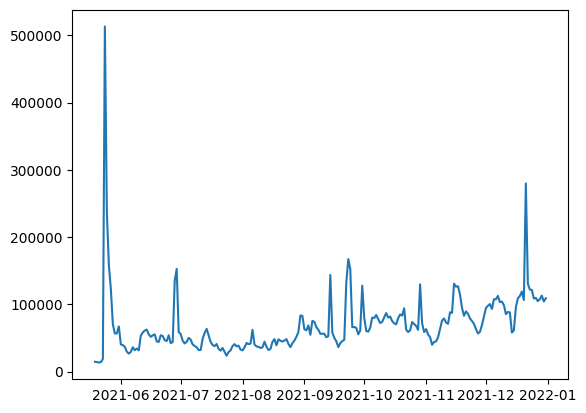

In [89]:
plt.plot(stats["visit_date"], stats["count"])

In [87]:
df.to_csv('data/first_all.csv')

## Feature engenering

In [2]:
df = pd.read_csv('data/first_all.csv')
df.head()

,Unnamed: 0,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,...,device_screen_resolution,device_browser,geo_country,geo_city,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action
0,0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,2024-05-07 14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,...,360x720,Chrome,Russia,Zlatoust,2021-11-24,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing
1,1,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,2024-05-07 14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,...,360x720,Chrome,Russia,Zlatoust,2021-11-24,4,event,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click
2,2,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14,2024-05-07 08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,...,385x854,Samsung Internet,Russia,Moscow,2021-11-14,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing
3,3,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,2024-05-07 02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,...,360x720,Chrome,Russia,Krasnoyarsk,2021-12-28,10,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region
4,4,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,2024-05-07 02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,...,360x720,Chrome,Russia,Krasnoyarsk,2021-12-28,13,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region


In [3]:
df.drop('Unnamed: 0', axis = 1, inplace=True)
df.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,...,device_screen_resolution,device_browser,geo_country,geo_city,hit_date,hit_number,hit_type,hit_page_path,event_category,event_action
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,2024-05-07 14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Zlatoust,2021-11-24,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing
1,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,2024-05-07 14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Zlatoust,2021-11-24,4,event,podpiska.sberauto.com/,sub_button_click,sub_view_cars_click
2,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14,2024-05-07 08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,mobile,...,385x854,Samsung Internet,Russia,Moscow,2021-11-14,3,event,podpiska.sberauto.com/,sub_page_view,sub_landing
3,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,2024-05-07 02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Krasnoyarsk,2021-12-28,10,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region
4,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,2024-05-07 02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,mobile,...,360x720,Chrome,Russia,Krasnoyarsk,2021-12-28,13,event,sberauto.com/cars?utm_source_initial=sbol&utm_...,search_form,search_form_region


In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15459382 entries, 0 to 15685218
Data columns (total 21 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   client_id                 float64
 2   visit_date                object 
 3   visit_time                object 
 4   visit_number              int64  
 5   utm_source                object 
 6   utm_medium                object 
 7   utm_campaign              object 
 8   utm_adcontent             object 
 9   device_category           object 
 10  device_brand              object 
 11  device_screen_resolution  object 
 12  device_browser            object 
 13  geo_country               object 
 14  geo_city                  object 
 15  hit_date                  object 
 16  hit_number                int64  
 17  hit_type                  object 
 18  hit_page_path             object 
 19  event_category            object 
 20  event_action              o

In [6]:
df.drop(['session_id', 'client_id', 'utm_source', 'utm_campaign', 'utm_adcontent',
         'device_screen_resolution', 'geo_city', 'hit_date', 'hit_type', 'hit_number',
         'hit_page_path', 'event_category'], axis=1, inplace=True)
df.head()

,visit_date,visit_time,visit_number,utm_medium,device_category,device_brand,device_browser,geo_country,event_action
0,2021-11-24,2024-05-07 14:36:32,1,banner,mobile,Huawei,Chrome,Russia,sub_landing
1,2021-11-24,2024-05-07 14:36:32,1,banner,mobile,Huawei,Chrome,Russia,sub_view_cars_click
2,2021-11-14,2024-05-07 08:21:30,1,cpm,mobile,Samsung,Samsung Internet,Russia,sub_landing
3,2021-12-28,2024-05-07 02:42:06,1,banner,mobile,Huawei,Chrome,Russia,search_form_region
4,2021-12-28,2024-05-07 02:42:06,1,banner,mobile,Huawei,Chrome,Russia,search_form_region


In [7]:
target_actions =  ['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 
                         'sub_custom_question_submit_click', 'sub_call_number_click', 'sub_callback_submit_click',
                         'sub_submit_success', 'sub_car_request_submit_click']


In [8]:
df['is_target'] = df['event_action'].apply(lambda act: 1 if act in target_actions else 0)
df.head()

,visit_date,visit_time,visit_number,utm_medium,device_category,device_brand,device_browser,geo_country,event_action,is_target
0,2021-11-24,2024-05-07 14:36:32,1,banner,mobile,Huawei,Chrome,Russia,sub_landing,0
1,2021-11-24,2024-05-07 14:36:32,1,banner,mobile,Huawei,Chrome,Russia,sub_view_cars_click,0
2,2021-11-14,2024-05-07 08:21:30,1,cpm,mobile,Samsung,Samsung Internet,Russia,sub_landing,0
3,2021-12-28,2024-05-07 02:42:06,1,banner,mobile,Huawei,Chrome,Russia,search_form_region,0
4,2021-12-28,2024-05-07 02:42:06,1,banner,mobile,Huawei,Chrome,Russia,search_form_region,0


In [9]:
df[df['is_target'] == 1].head()

,visit_date,visit_time,visit_number,utm_medium,device_category,device_brand,device_browser,geo_country,event_action,is_target
676,2021-06-14,2024-05-07 09:00:00,1,banner,mobile,Huawei,Chrome,Russia,sub_car_claim_click,1
710,2021-11-08,2024-05-07 21:10:07,1,banner,mobile,Apple,Safari,Russia,sub_submit_success,1
718,2021-11-08,2024-05-07 21:10:07,1,banner,mobile,Apple,Safari,Russia,sub_car_claim_submit_click,1
725,2021-11-08,2024-05-07 21:10:07,1,banner,mobile,Apple,Safari,Russia,sub_car_claim_click,1
775,2021-06-21,2024-05-07 22:00:00,1,cpc,desktop,other,Safari,Russia,sub_submit_success,1


In [10]:
df.drop('event_action', axis=1, inplace=True)
df.head()

,visit_date,visit_time,visit_number,utm_medium,device_category,device_brand,device_browser,geo_country,is_target
0,2021-11-24,2024-05-07 14:36:32,1,banner,mobile,Huawei,Chrome,Russia,0
1,2021-11-24,2024-05-07 14:36:32,1,banner,mobile,Huawei,Chrome,Russia,0
2,2021-11-14,2024-05-07 08:21:30,1,cpm,mobile,Samsung,Samsung Internet,Russia,0
3,2021-12-28,2024-05-07 02:42:06,1,banner,mobile,Huawei,Chrome,Russia,0
4,2021-12-28,2024-05-07 02:42:06,1,banner,mobile,Huawei,Chrome,Russia,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15459382 entries, 0 to 15685218
Data columns (total 9 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   visit_date       object
 1   visit_time       object
 2   visit_number     int64 
 3   utm_medium       object
 4   device_category  object
 5   device_brand     object
 6   device_browser   object
 7   geo_country      object
 8   is_target        int64 
dtypes: int64(2), object(7)
memory usage: 1.2+ GB


In [12]:
df.visit_time = pd.to_datetime(df.visit_time)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15459382 entries, 0 to 15685218
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   visit_date       object        
 1   visit_time       datetime64[ns]
 2   visit_number     int64         
 3   utm_medium       object        
 4   device_category  object        
 5   device_brand     object        
 6   device_browser   object        
 7   geo_country      object        
 8   is_target        int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.2+ GB


In [13]:
df['visit_hour'] = df['visit_time'].dt.hour
df.head()

,visit_date,visit_time,visit_number,utm_medium,device_category,device_brand,device_browser,geo_country,is_target,visit_hour
0,2021-11-24,2024-05-07 14:36:32,1,banner,mobile,Huawei,Chrome,Russia,0,14
1,2021-11-24,2024-05-07 14:36:32,1,banner,mobile,Huawei,Chrome,Russia,0,14
2,2021-11-14,2024-05-07 08:21:30,1,cpm,mobile,Samsung,Samsung Internet,Russia,0,8
3,2021-12-28,2024-05-07 02:42:06,1,banner,mobile,Huawei,Chrome,Russia,0,2
4,2021-12-28,2024-05-07 02:42:06,1,banner,mobile,Huawei,Chrome,Russia,0,2


In [14]:
df.visit_date = pd.to_datetime(df.visit_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15459382 entries, 0 to 15685218
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   visit_date       datetime64[ns]
 1   visit_time       datetime64[ns]
 2   visit_number     int64         
 3   utm_medium       object        
 4   device_category  object        
 5   device_brand     object        
 6   device_browser   object        
 7   geo_country      object        
 8   is_target        int64         
 9   visit_hour       int32         
dtypes: datetime64[ns](2), int32(1), int64(2), object(5)
memory usage: 1.2+ GB


In [15]:
df['visit_day_of_week'] = df.visit_date.dt.dayofweek
df['visit_month'] = df.visit_date.dt.month
df.head()

,visit_date,visit_time,visit_number,utm_medium,device_category,device_brand,device_browser,geo_country,is_target,visit_hour,visit_day_of_week,visit_month
0,2021-11-24,2024-05-07 14:36:32,1,banner,mobile,Huawei,Chrome,Russia,0,14,2,11
1,2021-11-24,2024-05-07 14:36:32,1,banner,mobile,Huawei,Chrome,Russia,0,14,2,11
2,2021-11-14,2024-05-07 08:21:30,1,cpm,mobile,Samsung,Samsung Internet,Russia,0,8,6,11
3,2021-12-28,2024-05-07 02:42:06,1,banner,mobile,Huawei,Chrome,Russia,0,2,1,12
4,2021-12-28,2024-05-07 02:42:06,1,banner,mobile,Huawei,Chrome,Russia,0,2,1,12


In [16]:
df.drop(['visit_date', 'visit_time'], axis=1, inplace=True)
df.head()

,visit_number,utm_medium,device_category,device_brand,device_browser,geo_country,is_target,visit_hour,visit_day_of_week,visit_month
0,1,banner,mobile,Huawei,Chrome,Russia,0,14,2,11
1,1,banner,mobile,Huawei,Chrome,Russia,0,14,2,11
2,1,cpm,mobile,Samsung,Samsung Internet,Russia,0,8,6,11
3,1,banner,mobile,Huawei,Chrome,Russia,0,2,1,12
4,1,banner,mobile,Huawei,Chrome,Russia,0,2,1,12


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15459382 entries, 0 to 15685218
Data columns (total 10 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   visit_number       int64 
 1   utm_medium         object
 2   device_category    object
 3   device_brand       object
 4   device_browser     object
 5   geo_country        object
 6   is_target          int64 
 7   visit_hour         int32 
 8   visit_day_of_week  int32 
 9   visit_month        int32 
dtypes: int32(3), int64(2), object(5)
memory usage: 1.1+ GB


In [18]:
x = df.drop(['is_target'], axis=1)
y = df['is_target']

In [19]:
categorial_features = x.select_dtypes(include=['object']).columns
numerical_features = x.select_dtypes(exclude=['object']).columns
print(categorial_features)
print(numerical_features)


Index(['utm_medium', 'device_category', 'device_brand', 'device_browser',
       'geo_country'],
      dtype='object')
Index(['visit_number', 'visit_hour', 'visit_day_of_week', 'visit_month'], dtype='object')


In [20]:
del df
gc.collect()

15

In [21]:
categories = [x[column].unique() for column in x[categorial_features].columns]
categories

[array(['banner', 'cpm', 'cpc', 'organic', '(none)', 'referral', 'smm',
        'stories', 'blogger_channel', 'blogger_stories', 'email', 'app',
        'push', 'partner', 'tg', 'cpv', 'cpa', 'post', 'smartbanner',
        'info_text', 'outlook', 'clicks', 'landing', 'blogger_header',
        'qr', '(not set)', 'google_cpc', 'sms', 'article', 'vk_smm',
        'static', 'cbaafe', 'Sbol_catalog', 'fb_smm', 'landing_interests',
        'yandex_cpc', 'web_polka', 'ok_smm', 'linktest', 'sber_app', 'CPM',
        'medium', 'tablet', 'promo_sbol', 'reach', 'dom_click', 'nkp',
        'social', 'catalogue', 'main_polka', 'last', 'link', 'users_msk',
        'qrcodevideo', 'promo_sber'], dtype=object),
 array(['mobile', 'tablet', 'desktop'], dtype=object),
 array(['Huawei', 'Samsung', 'Xiaomi', 'Apple', 'Lenovo', 'other', 'Vivo',
        'Meizu', 'OnePlus', '(not set)', 'BQ', 'Realme', 'OPPO', 'itel',
        'Philips', 'Nokia', 'Alcatel', 'LG', 'Tecno', 'Asus', 'Infinix',
        'Sony', 'ZTE

In [22]:
encoder = OrdinalEncoder(categories=categories)
x[categorial_features] = encoder.fit_transform(x[categorial_features])
x.head()

,visit_number,utm_medium,device_category,device_brand,device_browser,geo_country,visit_hour,visit_day_of_week,visit_month
0,1,0.0,0.0,0.0,0.0,0.0,14,2,11
1,1,0.0,0.0,0.0,0.0,0.0,14,2,11
2,1,1.0,0.0,1.0,1.0,0.0,8,6,11
3,1,0.0,0.0,0.0,0.0,0.0,2,1,12
4,1,0.0,0.0,0.0,0.0,0.0,2,1,12


In [27]:
new_num_features = []
for col in numerical_features:
    new_num_features.append('std_'+col)
print(new_num_features)

['std_visit_number', 'std_visit_hour', 'std_visit_day_of_week', 'std_visit_month']


In [28]:
scaler = StandardScaler()

In [29]:
x[new_num_features] = scaler.fit_transform(x[numerical_features])
x.head()

,visit_number,utm_medium,device_category,device_brand,device_browser,geo_country,visit_hour,visit_day_of_week,visit_month,std_visit_number,std_visit_hour,std_visit_day_of_week,std_visit_month
0,1,0.0,0.0,0.0,0.0,0.0,14,2,11,-0.135149,0.042238,-0.372745,0.778369
1,1,0.0,0.0,0.0,0.0,0.0,14,2,11,-0.135149,0.042238,-0.372745,0.778369
2,1,1.0,0.0,1.0,1.0,0.0,8,6,11,-0.135149,-0.935926,1.631551,0.778369
3,1,0.0,0.0,0.0,0.0,0.0,2,1,12,-0.135149,-1.914090,-0.873819,1.209999
4,1,0.0,0.0,0.0,0.0,0.0,2,1,12,-0.135149,-1.914090,-0.873819,1.209999


In [30]:
x.drop(numerical_features, axis=1, inplace=True)
x.head()

,utm_medium,device_category,device_brand,device_browser,geo_country,std_visit_number,std_visit_hour,std_visit_day_of_week,std_visit_month
0,0.0,0.0,0.0,0.0,0.0,-0.135149,0.042238,-0.372745,0.778369
1,0.0,0.0,0.0,0.0,0.0,-0.135149,0.042238,-0.372745,0.778369
2,1.0,0.0,1.0,1.0,0.0,-0.135149,-0.935926,1.631551,0.778369
3,0.0,0.0,0.0,0.0,0.0,-0.135149,-1.914090,-0.873819,1.209999
4,0.0,0.0,0.0,0.0,0.0,-0.135149,-1.914090,-0.873819,1.209999


In [31]:
final_df = pd.concat([x, y], axis=1)
final_df.head()

,utm_medium,device_category,device_brand,device_browser,geo_country,std_visit_number,std_visit_hour,std_visit_day_of_week,std_visit_month,is_target
0,0.0,0.0,0.0,0.0,0.0,-0.135149,0.042238,-0.372745,0.778369,0
1,0.0,0.0,0.0,0.0,0.0,-0.135149,0.042238,-0.372745,0.778369,0
2,1.0,0.0,1.0,1.0,0.0,-0.135149,-0.935926,1.631551,0.778369,0
3,0.0,0.0,0.0,0.0,0.0,-0.135149,-1.914090,-0.873819,1.209999,0
4,0.0,0.0,0.0,0.0,0.0,-0.135149,-1.914090,-0.873819,1.209999,0


In [32]:
final_df.to_csv('data/final_data.csv', index=False)

## Modeling

In [3]:
df = pd.read_csv('data/final_data.csv')
df.head()

,utm_medium,device_category,device_brand,device_browser,geo_country,std_visit_number,std_visit_hour,std_visit_day_of_week,std_visit_month,is_target
0,0.0,0.0,0.0,0.0,0.0,-0.135149,0.042238,-0.372745,0.778369,0
1,0.0,0.0,0.0,0.0,0.0,-0.135149,0.042238,-0.372745,0.778369,0
2,1.0,0.0,1.0,1.0,0.0,-0.135149,-0.935926,1.631551,0.778369,0
3,0.0,0.0,0.0,0.0,0.0,-0.135149,-1.914090,-0.873819,1.209999,0
4,0.0,0.0,0.0,0.0,0.0,-0.135149,-1.914090,-0.873819,1.209999,0


In [4]:
x = df.drop(['is_target'], axis=1)
y = df['is_target']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
y_test.shape

(3091877,)

In [ ]:
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    SVC()
]

for m in models:
    m.fit(x_train, y_train)
    #y_pred = m.predict(x_test)
    print(f'ROC_AUC для {type(m).__name__}: {roc_auc_score(y_test, m.predict_proba(x_test)[:,1])}.')

ROC_AUC для LogisticRegression: 0.5795913237482987.
ROC_AUC для RandomForestClassifier: 0.78002425215818.


## Results

По результатам моделирования лучшая модель - RandomForestClassifier
По метрике ROC_AUC - 0.78